### <center>*Big Data tools and methods raport*<center>
##### <center>Matys Piotr 260337<center>


### **List 1**

##### Importing all needed libraries (Importowanie potrzebnych bibliotek)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from gurobipy import *

#### Task 1

##### Generating data and dividing it into train and test sets 

In [122]:
x, y = datasets.make_regression(n_samples=200, n_features=1, noise=12)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75)

##### Creating model and predicting values 

In [123]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

##### Parameters (Parametry)

In [124]:
print(f'Linear model params: a = {np.round(model.coef_[0],4)}, b = {np.round(model.intercept_,5)}')

Linear model params: a = 13.409, b = 1.43251


##### Rounding function

In [125]:
def round_to_multiple(number, multiple):
    return multiple * round(number / multiple)

##### Results visualization

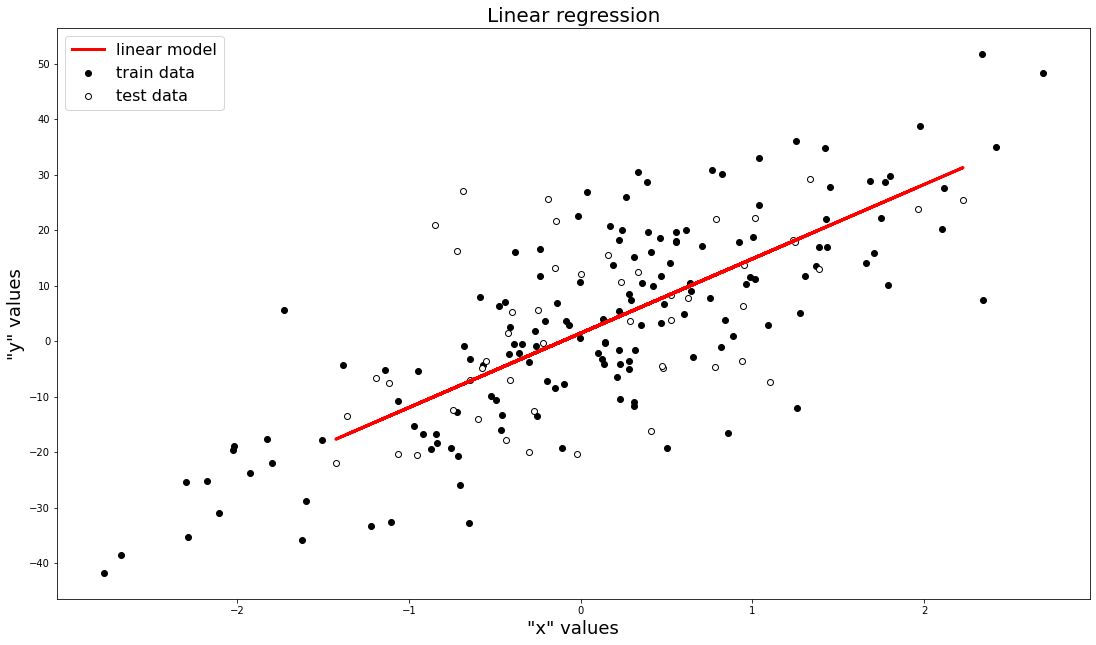

In [126]:
x_plot = list(np.linspace(start=x.min(), stop=x.max(), num=300))

plt.scatter(x_train, y_train, label='train data', color='black')
plt.scatter(x_test, y_test, edgecolor='black', facecolor='white', label='test data')
plt.plot(x_test, y_pred, color="red", linewidth=3, label='linear model')

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

y_min, y_max = round_to_multiple(int(min(y)), 10), round_to_multiple(int(max(y)), 10)
x_min, x_max = round_to_multiple(int(min(x)), 1), round_to_multiple(int(max(x)), 1)

y_linspace_number = (y_max - y_min) / 10 + 1
x_linspace_number = x_max - x_min + 1

x_ticks = np.linspace(x_min, x_max, int(x_linspace_number))
y_ticks = np.linspace(y_min, y_max, int(y_linspace_number))

plt.xticks(x_ticks)
plt.yticks(y_ticks)

plt.title('Linear regression', fontsize=20)
plt.xlabel('"x" values', fontsize=18)
plt.ylabel('"y" values', fontsize=18)

plt.legend(fontsize=16)
plt.show()

#### Task 2

##### Generating data and dividing it into train and test sets 

In [127]:
a = -10
b = 50

x_uniform = np.random.sample(200) # x values of the interval (0, 1]

x_values = (b-a) * x_uniform + a # changing them to be between (-10, 50)

y_values = []
y_values_with_z = []

a, b, c = 3, 5, 10 # function's coefficiants

for x_value in x_values:

    y_value = a * (x_value ** 2) + b * x_value + c
    y_values.append(y_value.__round__(2))

for y in y_values:
    z_uniform = np.random.uniform()
    z = (1100) * z_uniform + 1
    plus_or_minus = np.random.randint(3)
    sign_dict = {0: 1, 1: -1, 2: 1}
    # print(z)
    y_values_with_z.append(y + z * sign_dict[plus_or_minus]) # adding noise

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values_with_z, train_size=0.75)

##### Creating model and predicting values

In [128]:
model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(x_train.reshape(-1, 1)), y_train)

LinearRegression()

##### Model's estimated coefficiants 

In [129]:
_, a, b = model_GLM.coef_
print(f'Model GLM params: a = {round(a, 4)}, b = {round(b, 4)}, c = {np.round(model_GLM.intercept_, 3)}')

Model GLM params: a = 12.1534, b = 3.0031, c = 4.148


##### Comparing and visualizing results

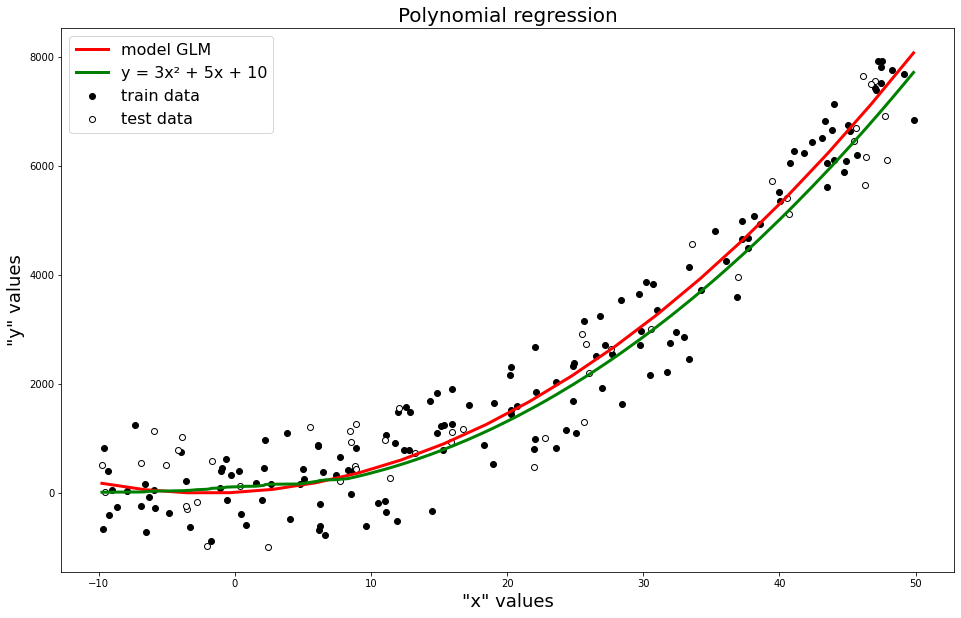

In [130]:
x_plot = np.linspace(start=x_values.min(), stop=x_values.max(), num=20)
y_GLM_pred_plot = model_GLM.predict(gen_features.fit_transform(x_plot.reshape(-1,1)))

plt.scatter(x_train, y_train, label='train data', color='black')
plt.scatter(x_test, y_test, edgecolor='black', facecolor='white', label='test data')
plt.plot(x_plot, y_GLM_pred_plot, color="red", linewidth=3, label='model GLM')

fig= plt.gcf()
fig.set_size_inches(16, 10)

x_values.sort()
y_values.sort()

plt.plot(x_values, y_values, color="green", linewidth=3, label='y = 3x² + 5x + 10')

plt.title('Polynomial regression', fontsize=20)
plt.xlabel('"x" values', fontsize=18)
plt.ylabel('"y" values', fontsize=18)
plt.legend(fontsize=16)

plt.show()

##### Real parameters are different from parameters which have been estimated by model - it is especially seen when we compare $a$ parameter of each model.

##### <center>Real equation of curve: $y = 3x² + 5x + 10$<center><center>Equation from model: $y = 12.1534x² + 3.0031x + 4.148$<center>

#### Task 2 - manual implementation

##### Generating data and dividing it into train and test sets

In [131]:
a = -10
b = 50

x_uniform = np.random.sample(200) # x values of the interval (0, 1]

x_values = (b-a) * x_uniform + a # changing them to be between (-10, 50)

y_values = []
y_values_with_z = []

a, b, c = 2, 5, 4 # function's coefficiants

for x_value in x_values:

    y_value = a * (x_value ** 2) + b * x_value + c
    y_values.append(y_value.__round__(2))

for y in y_values:
    z_uniform = np.random.uniform()
    z = (300) * z_uniform + 1
    plus_or_minus = np.random.randint(2)
    sign_dict = {0: 1, 1: -1}
    # print(z)
    y_values_with_z.append(y + z * sign_dict[plus_or_minus]) # adding noise

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values_with_z, train_size=0.75)

##### Creating model (less squares function minimalization)

In [ ]:
regression_model = Model('Polynomial regression')

a = regression_model.addVar(vtype=GRB.CONTINUOUS, name='a')
b = regression_model.addVar(vtype=GRB.CONTINUOUS, name='b')
c = regression_model.addVar(vtype=GRB.CONTINUOUS, name='c')

less_squares_function = (1 / (2 * len(x_train))) *\
                        (sum([(y_train[index] - (a * (x_train[index])**2 + b * x_train[index]  + c)) ** 2 for index in range(len(x_train))]))

regression_model.setObjective(less_squares_function, GRB.MINIMIZE)
regression_model.optimize()

##### Model's estimated coefficiants

In [133]:
new_coeficiants = []

for v in regression_model.getVars():
    new_coeficiants.append(float(v.x).__round__(2))
    print(f'{v.varName} : {v.x}')

a : 2.035603756634333
b : 2.9391988466548464
c : 4.969746130190846e-11


##### Getting predictions

In [134]:
y_pred_values = []

for x in x_test:
    y_pred_value = new_coeficiants[0] * x**2 + new_coeficiants[1] * x + new_coeficiants[2]
    y_pred_values.append(y_pred_value)

##### Comparing and visualizing results

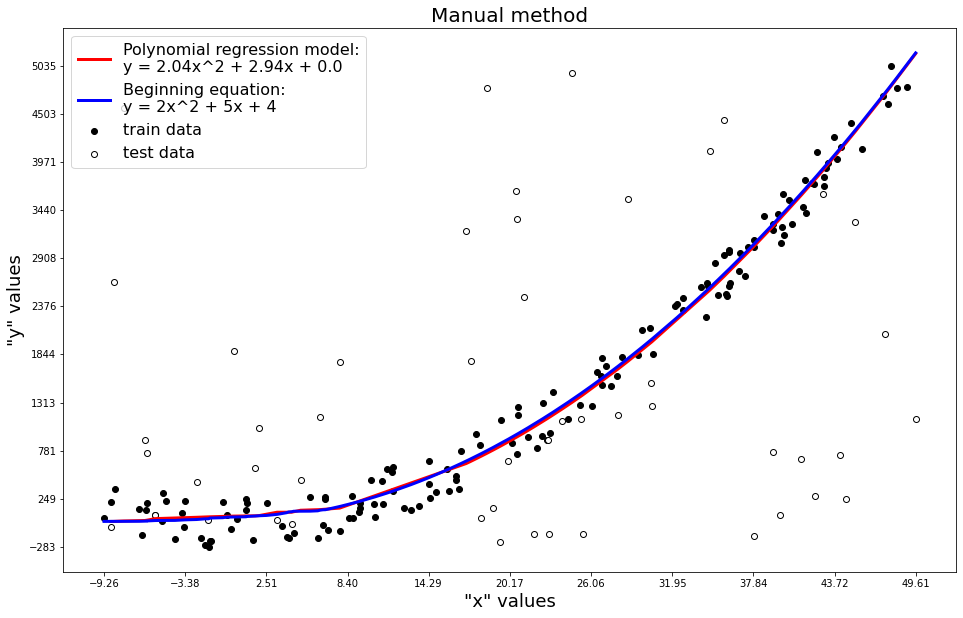

In [137]:
x_values.sort()
y_values.sort()

x_plot = list(np.linspace(start=x_values.min(), stop=x_values.max(), num=300))

y_pred_values.sort()
x_test.sort()

plt.scatter(x_train, y_train, label='train data', color='black')
plt.scatter(x_test, y_test, edgecolor='black', facecolor='white', label='test data')
plt.plot(x_test, y_pred_values, color="red", linewidth=3, label=f'Polynomial regression model:\ny = {new_coeficiants[0]}x^2 + {new_coeficiants[1]}x + {new_coeficiants[2]}')
plt.plot(x_values, y_values, color='blue', linewidth=3, label=f'Beginning equation:\ny = {2}x^2 + {5}x + 4')

fig = plt.gcf()
fig.set_size_inches(16, 10)

x_ticks = np.linspace(min(x_values), max(x_values), 11)
y_ticks = np.linspace(min(y_values_with_z), max(y_values_with_z), 11)

plt.xticks(x_ticks)
plt.yticks(y_ticks)

plt.title('Manual method', fontsize=20)
plt.xlabel('"x" values', fontsize=18)
plt.ylabel('"y" values', fontsize=18)
plt.legend(fontsize=16)

plt.show()

##### When we look at plot above we can see that estimated and real curve look very similar, but in theirs equations the biggest difference is that for estimated model intercept is equal to 0

##### <center>Real equation of curve: $y = 2x² + 5x + 4$<center><center>Equation from model: $y = 2.04x² + 2.94x + 0$<center>

#### Task 3

##### Generating data and dividing it into train and test sets

In [169]:
a = -10
b = 50

x_uniform = np.random.sample(200)

x_values = (b-a) * x_uniform + a
y_values = []
y_values_with_z = []

a, b = 2, 5 # function's coefficiants

for x_value in x_values:

    y_value = a * x_value + b
    y_values.append(y_value.__round__(2))

for y in y_values:
    z_uniform = np.random.uniform()
    z = 14 * z_uniform + 1
    plus_or_minus = np.random.randint(2)
    sign_dict = {0: 1, 1: -1}
    y_values_with_z.append(y + z * sign_dict[plus_or_minus]) # adding noise


x_train, x_test, y_train, y_test = train_test_split(x_values, y_values_with_z, train_size=0.75)

##### Creating model with regularization and predicting values

In [180]:
model_l2 = linear_model.Ridge(alpha=0.05)
model_l2.fit(x_train.reshape(-1, 1), y_train)
y_pred_l2 = model.predict(x_test.reshape(-1, 1))

model_l1 = linear_model.Lasso(alpha=0.1)
model_l1.fit(x_train.reshape(-1, 1), y_train)
y_pred_l1 = model.predict(x_test.reshape(-1, 1))

##### Model parameters

In [181]:
print(f' Model with L1 regularization: a = {model_l1.coef_[0]}, b = {model_l1.intercept_}\n')
print(f' Model with L2 regularization: a = {model_l2.coef_[0]}, b = {model_l2.intercept_}')

 Model with L1 regularization: a = 2.0285984447633054, b = 3.885475165907188

 Model with L2 regularization: a = 2.028904610619596, b = 3.8795911838643278


##### Plotting and comparing results

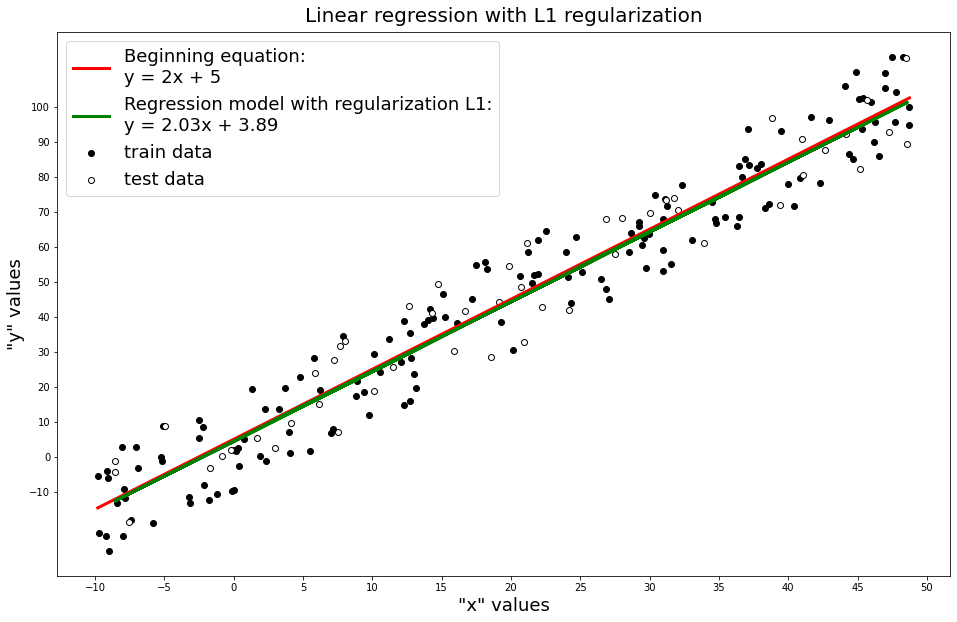

In [187]:
x_values.sort()
y_values.sort()

x_plot = list(np.linspace(start=x_values.min(), stop=x_values.max(), num=300))

plt.scatter(x_train, y_train, label='train data', color='black')
plt.scatter(x_test, y_test, edgecolor='black', facecolor='white', label='test data')
plt.plot(x_values, y_values, color='red', linewidth=3, label=f'Beginning equation:\ny = {a}x + {b}')
plt.plot(x_test, y_pred_l1, color="green", linewidth=3, label=f'Regression model with regularization L1:\ny = {round(model_l1.coef_[0], 2)}x + {round(model_l1.intercept_, 2)}')

fig = plt.gcf()
fig.set_size_inches(16, 10)

y_min, y_max = round_to_multiple(int(min(y_values)), 10), round_to_multiple(int(max(y_values)), 10)
x_min, x_max = round_to_multiple(int(min(x_values)), 5), round_to_multiple(int(max(x_values)), 5)

y_linspace_number = (y_max - y_min) / 10 + 1
x_linspace_number = (x_max - x_min) / 5 + 1

x_ticks = np.linspace(x_min, x_max, int(x_linspace_number))
y_ticks = np.linspace(y_min, y_max, int(y_linspace_number))

plt.xticks(x_ticks)
plt.yticks(y_ticks)

plt.title('Linear regression with L1 regularization', fontsize=20, pad=10)
plt.xlabel('"x" values', fontsize=18)
plt.ylabel('"y" values', fontsize=18)

plt.legend(fontsize=18)
plt.show()

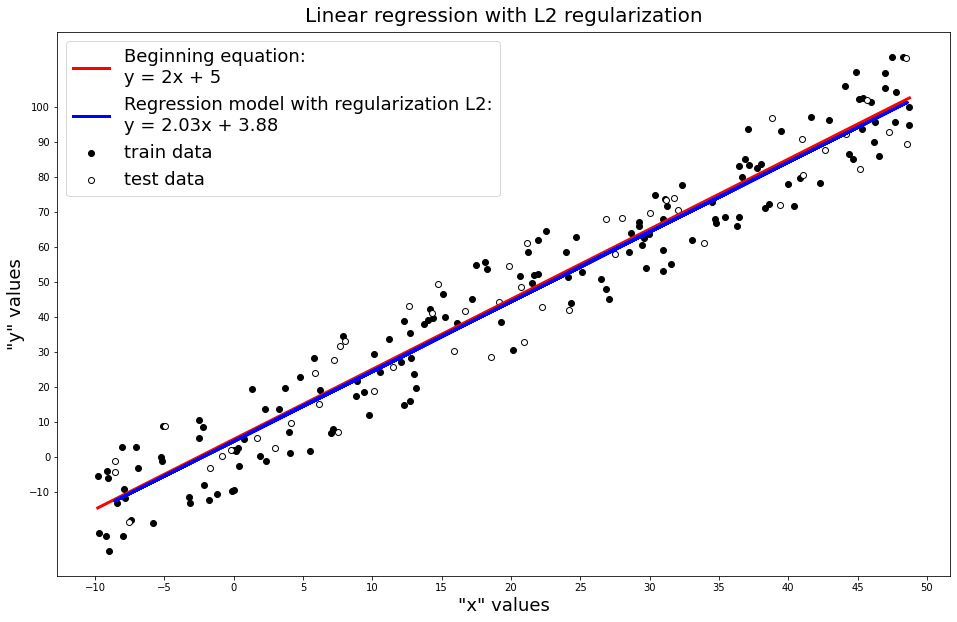

In [188]:
plt.scatter(x_train, y_train, label='train data', color='black')
plt.scatter(x_test, y_test, edgecolor='black', facecolor='white', label='test data')
plt.plot(x_values, y_values, color='red', linewidth=3, label=f'Beginning equation:\ny = {a}x + {b}')
plt.plot(x_test, y_pred_l2, color="blue", linewidth=3, label=f'Regression model with regularization L2:\ny = {round(model_l2.coef_[0], 2)}x + {round(model_l2.intercept_, 2)}')

fig = plt.gcf()
fig.set_size_inches(16, 10)

y_min, y_max = round_to_multiple(int(min(y_values)), 10), round_to_multiple(int(max(y_values)), 10)
x_min, x_max = round_to_multiple(int(min(x_values)), 5), round_to_multiple(int(max(x_values)), 5)

y_linspace_number = (y_max - y_min) / 10 + 1
x_linspace_number = (x_max - x_min) / 5 + 1

x_ticks = np.linspace(x_min, x_max, int(x_linspace_number))
y_ticks = np.linspace(y_min, y_max, int(y_linspace_number))

plt.xticks(x_ticks)
plt.yticks(y_ticks)

plt.title('Linear regression with L2 regularization', fontsize=20, pad=10)
plt.xlabel('"x" values', fontsize=18)
plt.ylabel('"y" values', fontsize=18)

plt.legend(fontsize=18)
plt.show()

##### Estimated parameters for both regularizations are very similar to real values, it is reflected on plots above.

##### <center>Real equation of straight: $y = 2x + 5$<center><center>Equation from model L1 regularization: $y = 2.03x + 3.89$<center>Equation from model L2 regularization: $y = 2.03x + 3.88$

#### Task 3 (Manual implementation)

##### Generating data and dividing it into train and test sets

In [151]:
a = -10
b = 50

x_uniform = np.random.sample(200)

x_values = (b-a) * x_uniform + a
y_values = []
y_values_with_z = []

a, b = 2, 5 # function's coefficiants

for x_value in x_values:

    y_value = a * x_value + b
    y_values.append(y_value.__round__(2))

for y in y_values:
    z_uniform = np.random.uniform()
    z = 14 * z_uniform + 1
    plus_or_minus = np.random.randint(2)
    sign_dict = {0: 1, 1: -1}
    y_values_with_z.append(y + z * sign_dict[plus_or_minus]) # adding noise


x_train, x_test, y_train, y_test = train_test_split(x_values, y_values_with_z, train_size=0.75)

##### Creating model with regularization (less squares with loss function minimalization)

In [ ]:
regression_model = Model('Regression model with L2 regularization')

a = regression_model.addVar(vtype=GRB.CONTINUOUS, name='a')
b = regression_model.addVar(vtype=GRB.CONTINUOUS, name='b')

coefs = [a, b]
lam = 0.1

less_squares_function = (1 / (2 * len(x_train))) *\
                        (sum([(y_train[index] - (a * x_train[index] + b)) ** 2 for index in range(len(x_train))]))\
                        + lam * sum([coef ** 2 for coef in coefs])

regression_model.setObjective(less_squares_function, GRB.MINIMIZE)
regression_model.optimize()

##### Model parameters

In [155]:
new_coeficiants = []

for v in regression_model.getVars():
    new_coeficiants.append(float(v.x).__round__(2))
    print(f'{v.varName} = {(v.x).__round__(4)}')

a = 2.0321
b = 4.4939


##### Getting predictions

In [194]:
y_pred_values = []

for x in x_test:
    y_pred_value = new_coeficiants[0] * x + new_coeficiants[1]
    y_pred_values.append(y_pred_value)

##### Plotting and comparing results

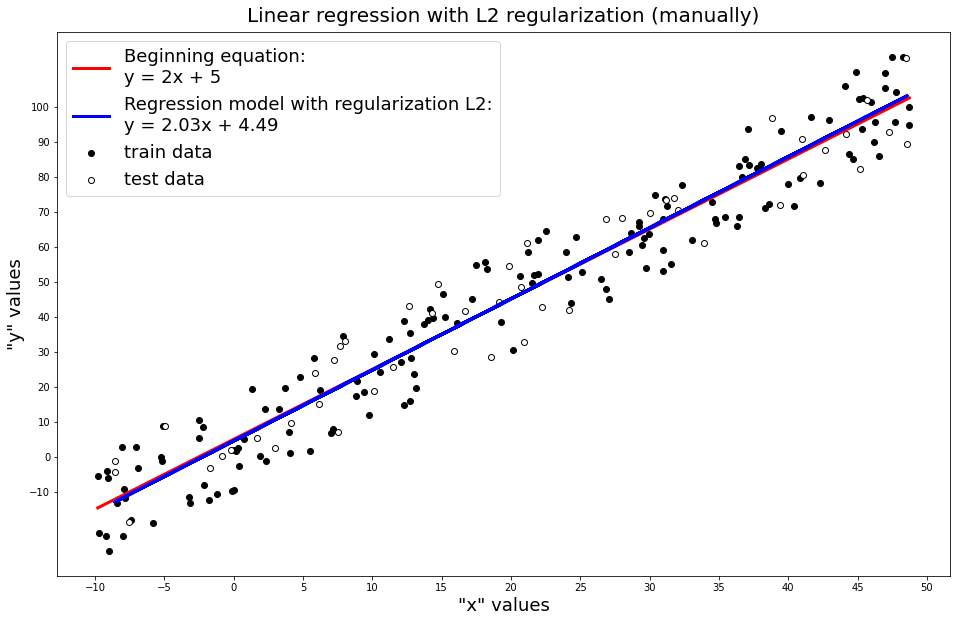

In [196]:
x_values.sort()
y_values.sort()

x_plot = list(np.linspace(start=x_values.min(), stop=x_values.max(), num=300))

plt.scatter(x_train, y_train, label='train data', color='black')
plt.scatter(x_test, y_test, edgecolor='black', facecolor='white', label='test data')
plt.plot(x_values, y_values, color='red', linewidth=3, label=f'Beginning equation:\ny = 2x + 5')
plt.plot(x_test, y_pred_values, color="blue", linewidth=3, label=f'Regression model with regularization L2:\ny = {new_coeficiants[0]}x + {new_coeficiants[1]}')

fig = plt.gcf()
fig.set_size_inches(16, 10)

y_min, y_max = round_to_multiple(int(min(y_values)), 10), round_to_multiple(int(max(y_values)), 10)
x_min, x_max = round_to_multiple(int(min(x_values)), 5), round_to_multiple(int(max(x_values)), 5)

y_linspace_number = (y_max - y_min) / 10 + 1
x_linspace_number = (x_max - x_min) / 5 + 1

x_ticks = np.linspace(x_min, x_max, int(x_linspace_number))
y_ticks = np.linspace(y_min, y_max, int(y_linspace_number))

plt.xticks(x_ticks)
plt.yticks(y_ticks)

plt.title('Linear regression with L2 regularization (manually)', fontsize=20, pad=10)
plt.xlabel('"x" values', fontsize=18)
plt.ylabel('"y" values', fontsize=18)

plt.legend(fontsize=18)
plt.show()

##### Estimated parameters for manual implementation of model with L2 regularization are very similar to real values and straights on the plot above look almost identical.

##### <center>Real equation of straight: $y = 2x + 5$<center>Equation from model with L2 regularization (manual version): $y = 2.03x + 4.49$